Saving Housing.csv to Housing (1).csv
Dataset shape: (545, 13)

First 5 rows:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

Processed dataset:
 

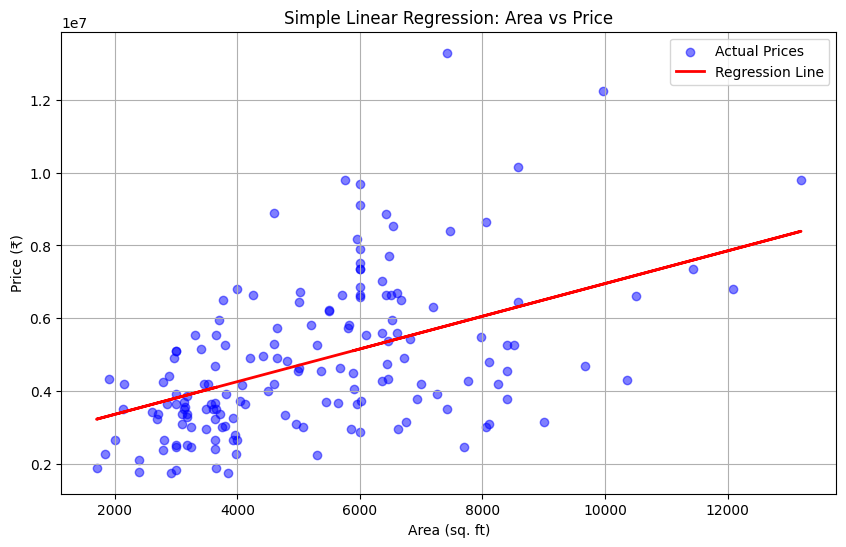


Interpretation:
House price increases by ₹449.45 per sq. ft increase in area
Base price (when area=0): ₹2457461.53

Multiple Linear Regression Results:
- Coefficients:
  area: 253.06
  bedrooms: 82734.87
  bathrooms: 1117372.87
  stories: 415801.12
  mainroad: 408320.46
  guestroom: 279534.04
  basement: 484980.22
  hotwaterheating: 619934.35
  airconditioning: 680006.92
  parking: 304078.33
  prefarea: 509441.46
  furnishingstatus: -198031.33
- Intercept: 124157.76
- MAE: 925543.55
- MSE: 1535047758428.05
- RMSE: 1238970.44
- R²: 0.6435


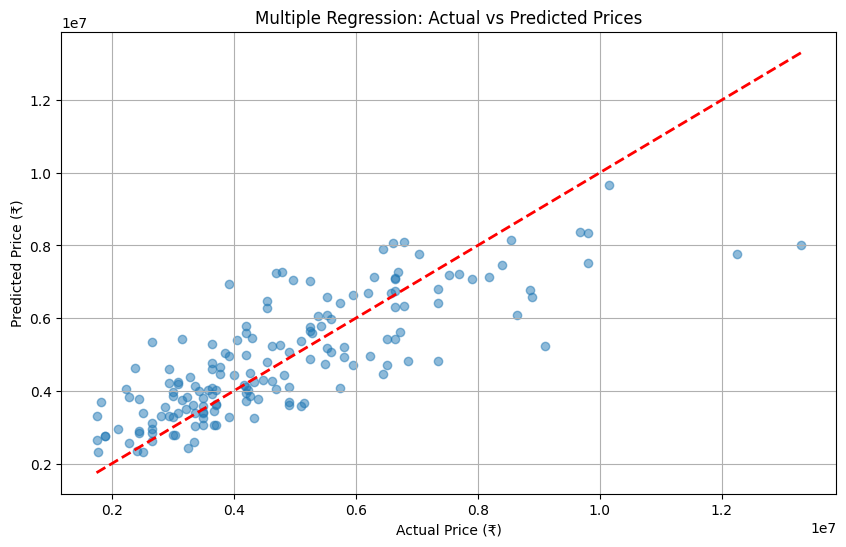


Key Feature Interpretations:
- Area: Each additional sq. ft increases price by ₹253.06
- Bedrooms: Each additional bedroom increases price by ₹82734.87
- Bathrooms: Each additional bathroom increases price by ₹1117372.87
- Air Conditioning: Increases price by ₹680006.92
- Furnishing: Higher values indicate better furnishing (0=unfurnished, 1=semi, 2=furnished)


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

from google.colab import files
uploaded = files.upload()

df = pd.read_csv('Housing.csv')
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

# Preprocessing
# Convert categorical variables to numerical (0/1)
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df[binary_cols] = df[binary_cols].apply(lambda x: x.map({'yes': 1, 'no': 0}))

le = LabelEncoder()
df['furnishingstatus'] = le.fit_transform(df['furnishingstatus'])

print("\nProcessed dataset:")
print(df.head())

X_simple = df[['area']]
y = df['price']

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_simple, y, test_size=0.3, random_state=42
)

simple_model = LinearRegression()
simple_model.fit(X_train_s, y_train_s)

y_pred_s = simple_model.predict(X_test_s)

# Evaluate
print("\nSimple Linear Regression Results:")
print(f"- Slope (Coefficient): {simple_model.coef_[0]:.2f}")
print(f"- Intercept: {simple_model.intercept_:.2f}")
print(f"- MAE: {mean_absolute_error(y_test_s, y_pred_s):.2f}")
print(f"- MSE: {mean_squared_error(y_test_s, y_pred_s):.2f}")
print(f"- RMSE: {np.sqrt(mean_squared_error(y_test_s, y_pred_s)):.2f}")
print(f"- R²: {r2_score(y_test_s, y_pred_s):.4f}")

plt.figure(figsize=(10, 6))
plt.scatter(X_test_s, y_test_s, color='blue', alpha=0.5, label='Actual Prices')
plt.plot(X_test_s, y_pred_s, color='red', linewidth=2, label='Regression Line')
plt.title('Simple Linear Regression: Area vs Price')
plt.xlabel('Area (sq. ft)')
plt.ylabel('Price (₹)')
plt.legend()
plt.grid(True)
plt.show()

print("\nInterpretation:")
print(f"House price increases by ₹{simple_model.coef_[0]:.2f} per sq. ft increase in area")
print(f"Base price (when area=0): ₹{simple_model.intercept_:.2f}")

X_multi = df.drop('price', axis=1)
y = df['price']

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
    X_multi, y, test_size=0.3, random_state=42
)

multi_model = LinearRegression()
multi_model.fit(X_train_m, y_train_m)

y_pred_m = multi_model.predict(X_test_m)

print("\nMultiple Linear Regression Results:")
print("- Coefficients:")
for col, coef in zip(X_multi.columns, multi_model.coef_):
    print(f"  {col}: {coef:.2f}")
print(f"- Intercept: {multi_model.intercept_:.2f}")
print(f"- MAE: {mean_absolute_error(y_test_m, y_pred_m):.2f}")
print(f"- MSE: {mean_squared_error(y_test_m, y_pred_m):.2f}")
print(f"- RMSE: {np.sqrt(mean_squared_error(y_test_m, y_pred_m)):.2f}")
print(f"- R²: {r2_score(y_test_m, y_pred_m):.4f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test_m, y_pred_m, alpha=0.5)
plt.plot([y_test_m.min(), y_test_m.max()],
         [y_test_m.min(), y_test_m.max()],
         'r--', lw=2)
plt.title('Multiple Regression: Actual vs Predicted Prices')
plt.xlabel('Actual Price (₹)')
plt.ylabel('Predicted Price (₹)')
plt.grid(True)
plt.show()

print("\nKey Feature Interpretations:")
print(f"- Area: Each additional sq. ft increases price by ₹{multi_model.coef_[0]:.2f}")
print(f"- Bedrooms: Each additional bedroom increases price by ₹{multi_model.coef_[1]:.2f}")
print(f"- Bathrooms: Each additional bathroom increases price by ₹{multi_model.coef_[2]:.2f}")
print(f"- Air Conditioning: Increases price by ₹{multi_model.coef_[8]:.2f}")
print(f"- Furnishing: Higher values indicate better furnishing (0=unfurnished, 1=semi, 2=furnished)")